# Location for opening a Thai restaurant in Miami analysis

## A Introduction

### A1. Description and background:

The background of the analysis is really simple my sister which is Thai now she is working in a restaurant in Miami, Florida. In the case that she wants to start her own restaurant she might want to know which location is the best.

As we all know that Miami is a big city and is one of the most popular tourist destinations in the world. To invest in opening a restaurant ,it would be very high competitive and require high investment. This analysis would help to choose a location that make the restaurant to be successful.



### A2. Data Description

The data that will be used in this analysis:
 - List of neighborhoods in Miami from wikipedia
 - data of restaurant in Miami from Foursquare
 

In [1]:
# Import library and import neighborhood data from wiki
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Miami")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [2]:
df = df[0]

In [3]:
df.shape

(26, 6)

In [4]:
df

,Neighborhood,Demonym,Population2010,Population/Km²,Sub-neighborhoods,Coordinates
0,Allapattah,NaN,54289,4401,NaN,25.815-80.224
1,Arts & Entertainment District,NaN,11033,7948,NaN,25.799-80.190
2,Brickell,Brickellite,31759,14541,West Brickell,25.758-80.193
3,Buena Vista,NaN,9058,3540,Buena Vista East Historic District and Design ...,25.813-80.192
4,Coconut Grove,Grovite,20076,3091,"Center Grove, Northeast Coconut Grove, Southwe...",25.712-80.257
5,Coral Way,NaN,35062,4496,"Coral Gate, Golden Pines, Shenandoah, and Silv...",25.750-80.283
6,Design District,NaN,3573,3623,NaN,25.813-80.193
7,Downtown,Downtowner,"71,000 (13,635 CBD only)",10613,"Brickell, Central Business District (CBD), Dow...",25.774-80.193
8,Edgewater,NaN,15005,6675,NaN,25.802-80.190
9,Flagami,NaN,50834,5665,"Alameda, Grapeland Heights, and Fairlawn",25.762-80.316


## B Data Cleaning

In [5]:
# Drop columns that are not used in the analysis
df = df.drop(['Demonym','Sub-neighborhoods'],axis =1)

In [6]:
df

,Neighborhood,Population2010,Population/Km²,Coordinates
0,Allapattah,54289,4401,25.815-80.224
1,Arts & Entertainment District,11033,7948,25.799-80.190
2,Brickell,31759,14541,25.758-80.193
3,Buena Vista,9058,3540,25.813-80.192
4,Coconut Grove,20076,3091,25.712-80.257
5,Coral Way,35062,4496,25.750-80.283
6,Design District,3573,3623,25.813-80.193
7,Downtown,"71,000 (13,635 CBD only)",10613,25.774-80.193
8,Edgewater,15005,6675,25.802-80.190
9,Flagami,50834,5665,25.762-80.316


In [7]:
# Drop rows which has no information of Population Density and Coordination
df = df.drop([11, 16, 21, 22, 25])

In [8]:
# Reassign values in Neighborhood Downtown
df.Population2010[7] = '71000'

In [9]:
# Assign type of data to integer for Population2010 and Population/Km²
df['Population2010'] = df['Population2010'].astype(int)
df['Population/Km²'] = df['Population/Km²'].astype(int)

In [10]:
df_sort_pop = df.sort_values(by=['Population2010'], ascending=False).head()

In [11]:
df_sort_pop

,Neighborhood,Population2010,Population/Km²,Coordinates
14,Little Havana,76163,8423,25.773-80.215
7,Downtown,71000,10613,25.774-80.193
0,Allapattah,54289,4401,25.815-80.224
9,Flagami,50834,5665,25.762-80.316
5,Coral Way,35062,4496,25.750-80.283


In [12]:
import matplotlib.pyplot as plt

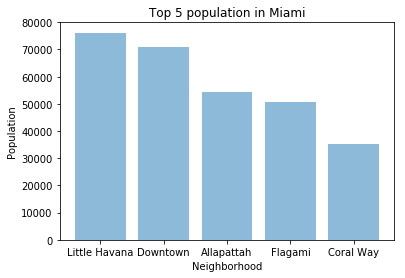

In [13]:

plt.bar(df_sort_pop.Neighborhood, df_sort_pop.Population2010, align='center', alpha=0.5)
plt.xticks(df_sort_pop.Neighborhood)
plt.ylabel('Population')
plt.xlabel('Neighborhood')
plt.title('Top 5 population in Miami')
 
plt.show()

In [14]:
# Separate Coordinates to Latitude and Longitude
df['Latitude'] = ''
df['Longitude'] = ''
df = df.reset_index()
df.head()

,index,Neighborhood,Population2010,Population/Km²,Coordinates,Latitude,Longitude
0,0,Allapattah,54289,4401,25.815-80.224,,
1,1,Arts & Entertainment District,11033,7948,25.799-80.190,,
2,2,Brickell,31759,14541,25.758-80.193,,
3,3,Buena Vista,9058,3540,25.813-80.192,,
4,4,Coconut Grove,20076,3091,25.712-80.257,,


In [15]:
# Iterate to extract values of Latitude and Longitude from Coordinates
for i in range(df.shape[0]):
    df['Latitude'][i] = df['Coordinates'][i][0:6]
    
for i in range(df.shape[0]): 
    df['Longitude'][i] = df['Coordinates'][i][6:13]

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# Check result
df.head()

,index,Neighborhood,Population2010,Population/Km²,Coordinates,Latitude,Longitude
0,0,Allapattah,54289,4401,25.815-80.224,25.815,-80.224
1,1,Arts & Entertainment District,11033,7948,25.799-80.190,25.799,-80.190
2,2,Brickell,31759,14541,25.758-80.193,25.758,-80.193
3,3,Buena Vista,9058,3540,25.813-80.192,25.813,-80.192
4,4,Coconut Grove,20076,3091,25.712-80.257,25.712,-80.257


In [17]:
# Drop column Coordinates
df = df.drop(['Coordinates'],axis =1)

In [18]:
# select columns 
df = df.iloc[:,1:]

In [19]:
# Assign data types
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['Neighborhood'] = df['Neighborhood'].astype(str)

In [20]:
df_pop = df.sort_values(by=['Population2010'], ascending = False )
df_pop.head(5)

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
13,Little Havana,76163,8423,25.773,-80.215
7,Downtown,71000,10613,25.774,-80.193
0,Allapattah,54289,4401,25.815,-80.224
9,Flagami,50834,5665,25.762,-80.316
5,Coral Way,35062,4496,25.750,-80.283


In [21]:
df_den = df.sort_values(by=['Population/Km²'], ascending = False )
df_sort_den= df_den.head(5)

In [22]:
df_sort_den

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude
2,Brickell,31759,14541,25.758,-80.193
7,Downtown,71000,10613,25.774,-80.193
13,Little Havana,76163,8423,25.773,-80.215
1,Arts & Entertainment District,11033,7948,25.799,-80.190
8,Edgewater,15005,6675,25.802,-80.190


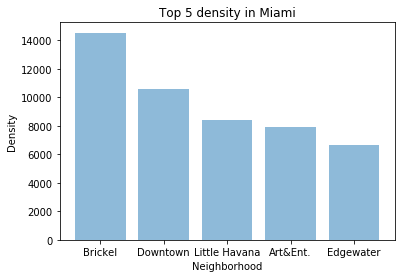

In [23]:
label_x = ['Brickel', 'Downtown', 'Little Havana', 'Art&Ent.', 'Edgewater']
x_pos = np.arange(len(label_x))

plt.bar(df_sort_den.Neighborhood, df_sort_den.iloc[:,2], align='center', alpha=0.5)
plt.xticks(x_pos, label_x)
plt.ylabel('Density')
plt.xlabel('Neighborhood')
plt.title('Top 5 density in Miami')
 
plt.show()

In [24]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [25]:
address = 'Miami'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 25.7742658, -80.1936589.


In [26]:
# create map of toronto using latitude and longitude values
map_miami = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood, popu, den in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Population2010'], df['Population/Km²']):
    label = '{}, Population: {}, Density: {}'.format(neighborhood, popu, den)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=den*0.002,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_miami)  
    
map_miami

Get data from Foursquare

In [27]:
CLIENT_ID = 'BBLJWEETWIJCLJQVRRV5IUJY1N3EVSBRAOBNNFFSW45LPM5F' # your Foursquare ID
CLIENT_SECRET = 'B1VTLXFXHUBZZ0FZLFCLIDQ2RKRTYAVTKZYAWVWNY5C2RNGW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [28]:
#nearby function

LIMIT = 200
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            'food')
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
df_food = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Allapattah
Arts & Entertainment District
Brickell
Buena Vista
Coconut Grove
Coral Way
Design District
Downtown
Edgewater
Flagami
Grapeland Heights
Liberty City
Little Haiti
Little Havana
Lummus Park
Overtown
Park West
The Roads
Upper Eastside
West Flagler
Wynwood


In [30]:
#check result dataframe
print(df_food.shape)
df_food.head()

(318, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allapattah,25.815,-80.224,Ribs On Deck,25.813065,-80.224282,American Restaurant
1,Arts & Entertainment District,25.799,-80.190,Jack's Home Cooking,25.800447,-80.191031,American Restaurant
2,Arts & Entertainment District,25.799,-80.190,La Provence French Bakery,25.798969,-80.189127,French Restaurant
3,Arts & Entertainment District,25.799,-80.190,Plant Food + Wine Miami,25.800452,-80.192805,Restaurant
4,Arts & Entertainment District,25.799,-80.190,Ted's at YoungArts,25.797391,-80.189204,Tapas Restaurant


In [31]:
df_food.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allapattah,1,1,1,1,1,1
Arts & Entertainment District,17,17,17,17,17,17
Brickell,45,45,45,45,45,45
Buena Vista,18,18,18,18,18,18
Coconut Grove,1,1,1,1,1,1
Coral Way,4,4,4,4,4,4
Design District,20,20,20,20,20,20
Downtown,39,39,39,39,39,39
Edgewater,39,39,39,39,39,39


In [32]:
# one hot encoding
df_onehot = pd.get_dummies(df_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_food['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

#intown_venues.head()
df_onehot.head()
df_onehot.columns

Index(['Neighborhood', 'American Restaurant', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bakery',
       'Bistro', 'Brazilian Restaurant', 'Breakfast Spot', 'Burger Joint',
       'Café', 'Caribbean Restaurant', 'Chinese Restaurant',
       'Comfort Food Restaurant', 'Cuban Restaurant', 'Deli / Bodega', 'Diner',
       'Donut Shop', 'Eastern European Restaurant', 'Empanada Restaurant',
       'Fast Food Restaurant', 'Food', 'Food Court', 'Food Truck',
       'French Restaurant', 'Fried Chicken Joint', 'Gastropub',
       'Greek Restaurant', 'Indian Restaurant', 'Indonesian Restaurant',
       'Italian Restaurant', 'Japanese Restaurant', 'Kosher Restaurant',
       'Latin American Restaurant', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant',
       'New American Restaurant', 'Peruvian Restaurant', 'Pizza Place',
       'Poke Place', 'Restaurant', 'Salad Place', 'Sandwich Place',
       'Seafood Restaurant',

In [33]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wings Joint
0,Allapattah,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arts & Entertainment District,0.058824,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.117647,0.000000,0.000000,0.000000
2,Brickell,0.044444,0.000000,0.044444,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.022222,0.044444,0.000000,0.000000,0.022222,0.000000,0.022222,0.000000
3,Buena Vista,0.055556,0.055556,0.000000,0.055556,0.0,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Coconut Grove,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Coral Way,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Design District,0.050000,0.050000,0.000000,0.050000,0.0,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Downtown,0.051282,0.000000,0.000000,0.000000,0.0,0.000000,0.025641,0.051282,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000
8,Edgewater,0.076923,0.000000,0.000000,0.000000,0.0,0.025641,0.025641,0.000000,0.051282,...,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.051282,0.000000,0.000000,0.000000
9,Flagami,0.000000,0.000000,0.000000,0.000000,0.0,0.153846,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000


In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,American Restaurant,Comfort Food Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Donut Shop
1,Arts & Entertainment District,Pizza Place,Restaurant,Sandwich Place,Tapas Restaurant,Cuban Restaurant,Food Truck,Breakfast Spot,Salad Place,American Restaurant,French Restaurant
2,Brickell,Café,Italian Restaurant,Japanese Restaurant,Food,Restaurant,Argentinian Restaurant,Seafood Restaurant,Steakhouse,French Restaurant,Sandwich Place
3,Buena Vista,Pizza Place,Italian Restaurant,Bakery,Café,Sandwich Place,Fast Food Restaurant,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Chinese Restaurant
4,Coconut Grove,Fried Chicken Joint,Comfort Food Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Donut Shop


In [36]:
venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,American Restaurant,Comfort Food Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Donut Shop
1,Arts & Entertainment District,Pizza Place,Restaurant,Sandwich Place,Tapas Restaurant,Cuban Restaurant,Food Truck,Breakfast Spot,Salad Place,American Restaurant,French Restaurant
2,Brickell,Café,Italian Restaurant,Japanese Restaurant,Food,Restaurant,Argentinian Restaurant,Seafood Restaurant,Steakhouse,French Restaurant,Sandwich Place
3,Buena Vista,Pizza Place,Italian Restaurant,Bakery,Café,Sandwich Place,Fast Food Restaurant,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Chinese Restaurant
4,Coconut Grove,Fried Chicken Joint,Comfort Food Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Donut Shop
5,Coral Way,Seafood Restaurant,Burger Joint,Café,Middle Eastern Restaurant,Wings Joint,Cuban Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant
6,Design District,Pizza Place,Sandwich Place,Italian Restaurant,Japanese Restaurant,Bakery,Café,Fast Food Restaurant,Indian Restaurant,Mediterranean Restaurant,Chinese Restaurant
7,Downtown,Italian Restaurant,Sandwich Place,Peruvian Restaurant,Café,Pizza Place,Greek Restaurant,Brazilian Restaurant,American Restaurant,Latin American Restaurant,Middle Eastern Restaurant
8,Edgewater,Pizza Place,Restaurant,American Restaurant,Sandwich Place,Food Truck,Breakfast Spot,Cuban Restaurant,French Restaurant,Tapas Restaurant,Deli / Bodega
9,Flagami,Bakery,Seafood Restaurant,Pizza Place,Food,Fast Food Restaurant,Taco Place,Peruvian Restaurant,Latin American Restaurant,Spanish Restaurant,Cuban Restaurant


# A3 Cluster analysis

In [37]:
# set number of clusters
kclusters = 6

grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [38]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_merged.head() # check the last columns!

,Neighborhood,Population2010,Population/Km²,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allapattah,54289,4401,25.815,-80.224,1,American Restaurant,Comfort Food Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Donut Shop
1,Arts & Entertainment District,11033,7948,25.799,-80.190,0,Pizza Place,Restaurant,Sandwich Place,Tapas Restaurant,Cuban Restaurant,Food Truck,Breakfast Spot,Salad Place,American Restaurant,French Restaurant
2,Brickell,31759,14541,25.758,-80.193,0,Café,Italian Restaurant,Japanese Restaurant,Food,Restaurant,Argentinian Restaurant,Seafood Restaurant,Steakhouse,French Restaurant,Sandwich Place
3,Buena Vista,9058,3540,25.813,-80.192,0,Pizza Place,Italian Restaurant,Bakery,Café,Sandwich Place,Fast Food Restaurant,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Chinese Restaurant
4,Coconut Grove,20076,3091,25.712,-80.257,3,Fried Chicken Joint,Comfort Food Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant,Eastern European Restaurant,Donut Shop


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, den in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels'], df_merged['Population/Km²'] ):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=den*0.002,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Population2010,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,11033,0,Pizza Place,Restaurant,Sandwich Place,Tapas Restaurant,Cuban Restaurant,Food Truck,Breakfast Spot,Salad Place,American Restaurant,French Restaurant
2,31759,0,Café,Italian Restaurant,Japanese Restaurant,Food,Restaurant,Argentinian Restaurant,Seafood Restaurant,Steakhouse,French Restaurant,Sandwich Place
3,9058,0,Pizza Place,Italian Restaurant,Bakery,Café,Sandwich Place,Fast Food Restaurant,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Chinese Restaurant
5,35062,0,Seafood Restaurant,Burger Joint,Café,Middle Eastern Restaurant,Wings Joint,Cuban Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant
6,3573,0,Pizza Place,Sandwich Place,Italian Restaurant,Japanese Restaurant,Bakery,Café,Fast Food Restaurant,Indian Restaurant,Mediterranean Restaurant,Chinese Restaurant
7,71000,0,Italian Restaurant,Sandwich Place,Peruvian Restaurant,Café,Pizza Place,Greek Restaurant,Brazilian Restaurant,American Restaurant,Latin American Restaurant,Middle Eastern Restaurant
8,15005,0,Pizza Place,Restaurant,American Restaurant,Sandwich Place,Food Truck,Breakfast Spot,Cuban Restaurant,French Restaurant,Tapas Restaurant,Deli / Bodega
9,50834,0,Bakery,Seafood Restaurant,Pizza Place,Food,Fast Food Restaurant,Taco Place,Peruvian Restaurant,Latin American Restaurant,Spanish Restaurant,Cuban Restaurant
12,29760,0,Pizza Place,Fast Food Restaurant,Donut Shop,Italian Restaurant,Seafood Restaurant,Spanish Restaurant,Caribbean Restaurant,Sushi Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant
14,3027,0,Seafood Restaurant,American Restaurant,Food,BBQ Joint,Spanish Restaurant,Diner,Restaurant,Comfort Food Restaurant,Food Truck,Food Court


In [41]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Population2010,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,76163,4,Latin American Restaurant,Taco Place,Bakery,Café,Restaurant,Mexican Restaurant,Deli / Bodega,Wings Joint,Cuban Restaurant,Food Court
17,7327,4,Vegetarian / Vegan Restaurant,Italian Restaurant,Latin American Restaurant,Salad Place,Mexican Restaurant,Wings Joint,Comfort Food Restaurant,Food Court,Food,Fast Food Restaurant
19,31407,4,Comfort Food Restaurant,Cuban Restaurant,Bakery,Latin American Restaurant,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Empanada Restaurant


5. Conclusion
The best location for opening a Thai restaurant in Miami is in Brickell or Downtown which both neighborhoods have high density and they both are in cluster 0 - ‘International Food’ cluster which Thai restaurant could be a good option for those mixed culture people. In the other hand Little Havana which has the highest population and the third of highest density but it is in cluster 4 - ‘Latino Food’ it might not be a good idea to open a Thai restaurant there.
